<a href="https://colab.research.google.com/github/dsdelapaz/fraud-detection-supervised/blob/main/Fraud-Detection-Logistic-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective

The objective is demonstrate the ability to create and evaluate a supervised model. For this assignment, data was taken from Kaggle. The dataset used is:

Supervised model - Credit Card Transactions Fraud Detection Dataset (https://www.kaggle.com/datasets/kartik2112/fraud-detection)


## Goal
1. For this supervised model, the goal is to create a model that can predict whether a transaction is fraudulent with reasonable accuracy. This will be done using the features provided in the dataset.


# Libraries

In [ ]:
# removes warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# import pandas to be able to use dataframes
import pandas as pd

# customize pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.6f}'.format)

# import plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn

# allow inline plotting on notebook cells
%matplotlib inline

# gives us access to numpy functions
import numpy as np
np.set_printoptions(suppress=True, precision=4)

# from scipy.stats import chisquare

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# allows us to implement a train test split strategy
from sklearn.model_selection import train_test_split

# access to the logistic regression class of Sklearn
from sklearn.linear_model import LogisticRegression

# model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,roc_auc_score

# recursive feature elimination, helps in prioritizing features
from sklearn.feature_selection import RFE

# model persistence
from joblib import dump, load

# Exploration

In [ ]:
# inmport training datasets
training_df = pd.read_csv("credit_card_data/fraudTrain.csv")
test_df = pd.read_csv("credit_card_data/fraudTest.csv")

full_df = pd.concat([training_df, test_df], axis=0)

#full_df = pd.read_csv("credit_card_data/fraudTest.csv")
full_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Features

In [ ]:
# check dataframe structure and the nature of its features
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [ ]:
# check for missing
full_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# check for duplicated records
full_df.duplicated().sum()

np.int64(0)

There are 22 features in the datases and are listed in the order they are arranged in the table:
1. trans_date_trans_time - date of transaction
2. cc_num - credit card number used in the transaction
3. merchant - merchant involved where transaction transpired
4. category - category of the merchant involved in the transaction
5. amt - amount of the transaction
6. first - first name of the credit card holder
7. last - last name of the credit card holder
8. gender - gender of the credit card holder
9. street - steet of the address of the credit card holder
10. city - city of the address of the credit card holder
11. state - state of the address of the credit card holder
12. zip - zip code of the address of the credit card holder
13. lat - latitutede of the address of the credit card holder
14. long - longtitude of the address of the credit card holder
15. city_pop - population of the city of the address of the credit card holder
16. job - job or occupation of the credit card holder
17. dob - date of birth of the credit card holder
18. trans_num - unique identifier for the transaction
19. unix_time - timestamp for the record
20. merch_lat - latitutede of the address of the merchant
21. merch_long - longtitude of the address of the merchant
22. is_fraud - identifier whether transaction is fraud or not, this is our target variable

Some of these features are consider Personally Identifiable Information (PII) or not relevant to the model. The following will be dropped:
1. Unnamed: 0 - dropped due to being not relevant to the model
2. cc_num - dropped due to being PII
3. first - dropped due to being PII
4. last - dropped due to being PII
6. street - dropped due to being not relevant to the model
7. trans_num - dropped to being not relevant to the model
8. unix_time - dropped due to being not relevant to the model

More features may be dropped later on but these are the ones that we can immediately drop.

In [ ]:
# dropping of not relevant features
full_df.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num', 'unix_time'], inplace=True)

We want to add more features to enrich our original dataset. These new features will be dervied base on existing columns in our data set. We want to add the following:
1. age - age of credit card holder at the time of transaction
2. trans_day -  day of trans_date_trans_time
3. trans_weekday - day of the week based on trans_date_trans_time
4. trans_month - month of trans_date_trans_time
5. trans_year - year of trans_date_trans_time
6. trans_hour - hour of trans_date_trans_time
7. trans_minute - minute of trans_date_trans_time

Since we will be dividing trans_date_trans_time into its different parts, trans_date_trans_time will be dropped, dob will also be dropped since age can be used to represent this.

In [ ]:
# convert trans_date_trans_time and dob to correct datetime format
full_df['trans_date_trans_time'] = pd.to_datetime(full_df['trans_date_trans_time'])
full_df['dob'] = pd.to_datetime(full_df['dob'])

# create new features
full_df['trans_day'] = full_df['trans_date_trans_time'].dt.day
full_df['trans_weekday'] = full_df['trans_date_trans_time'].dt.weekday
full_df['trans_month'] = full_df['trans_date_trans_time'].dt.month
full_df['trans_year'] = full_df['trans_date_trans_time'].dt.year
full_df['trans_hour'] = full_df['trans_date_trans_time'].dt.hour
full_df['trans_minute'] = full_df['trans_date_trans_time'].dt.minute
full_df['dob_year'] = full_df['dob'].dt.year
full_df['age'] = full_df['trans_year'] - full_df['dob_year']

full_df.drop(columns=['trans_date_trans_time', 'dob_year', 'dob'], inplace=True)

# Target

Now, we take a look at how our target variable is distributed in our dataset.

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column         Dtype  
---  ------         -----  
 0   merchant       object 
 1   category       object 
 2   amt            float64
 3   gender         object 
 4   city           object 
 5   state          object 
 6   zip            int64  
 7   lat            float64
 8   long           float64
 9   city_pop       int64  
 10  job            object 
 11  merch_lat      float64
 12  merch_long     float64
 13  is_fraud       int64  
 14  trans_day      int32  
 15  trans_weekday  int32  
 16  trans_month    int32  
 17  trans_year     int32  
 18  trans_hour     int32  
 19  trans_minute   int32  
 20  age            int32  
dtypes: float64(5), int32(7), int64(3), object(6)
memory usage: 261.5+ MB


In [ ]:
tmp_df = pd.DataFrame(full_df['is_fraud'].value_counts(normalize=True).reset_index(drop=True)).T
tmp_df.head()

,0,1
proportion,0.994790,0.005210


Only a very small percentage of our dataset contains fraud.

Let's take a look at the fraud rate by selected features. We did not include city and job because there are too many unique values for these categories. They will have their own section later.

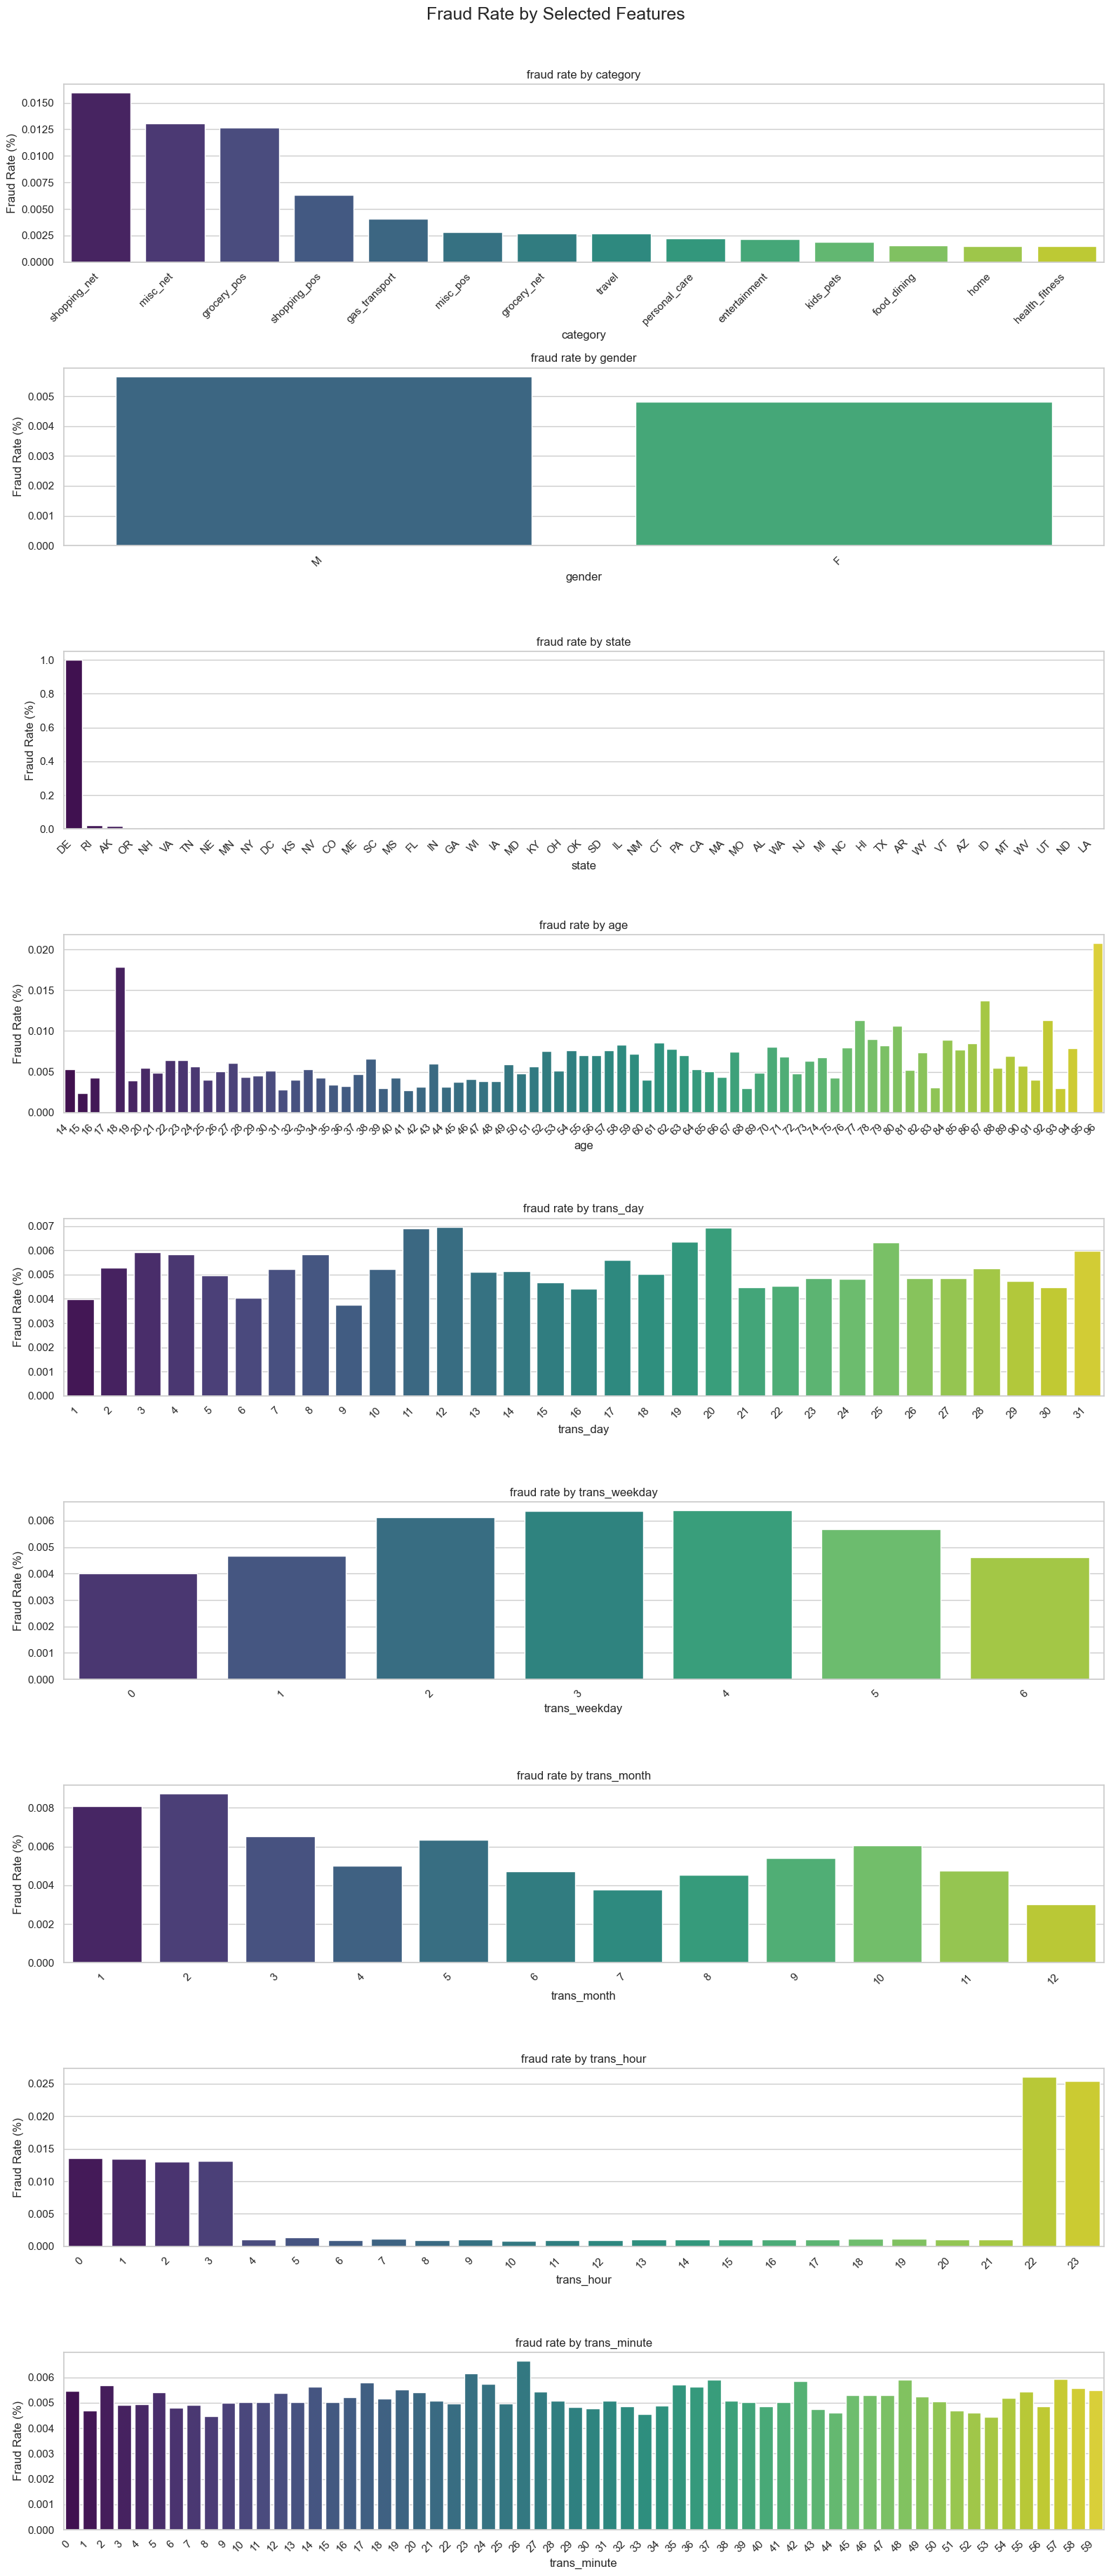

In [ ]:
# List of features to check
features_cols = ['category', 'gender', 'state', 'age', 'trans_day', 'trans_weekday', 'trans_month', 'trans_hour', 'trans_minute']

# Set plot style
sn.set(style="whitegrid")
plt.figure(figsize=(16, 4 * len(features_cols)))

for i, col in enumerate(features_cols, 1):
    plt.subplot(len(features_cols), 1, i)
    temp = full_df.groupby(col)['is_fraud'].mean().sort_values(ascending=False)
    sn.barplot(x=temp.index, y=temp.values, palette="viridis")
    plt.ylabel('Fraud Rate (%)')
    plt.title(f'fraud rate by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.suptitle("Fraud Rate by Selected Features", fontsize=18, y=1.02)
plt.show()

Based on the graphs, certain patterns emerge. We compare the graphs above with the distribution of these categories below.

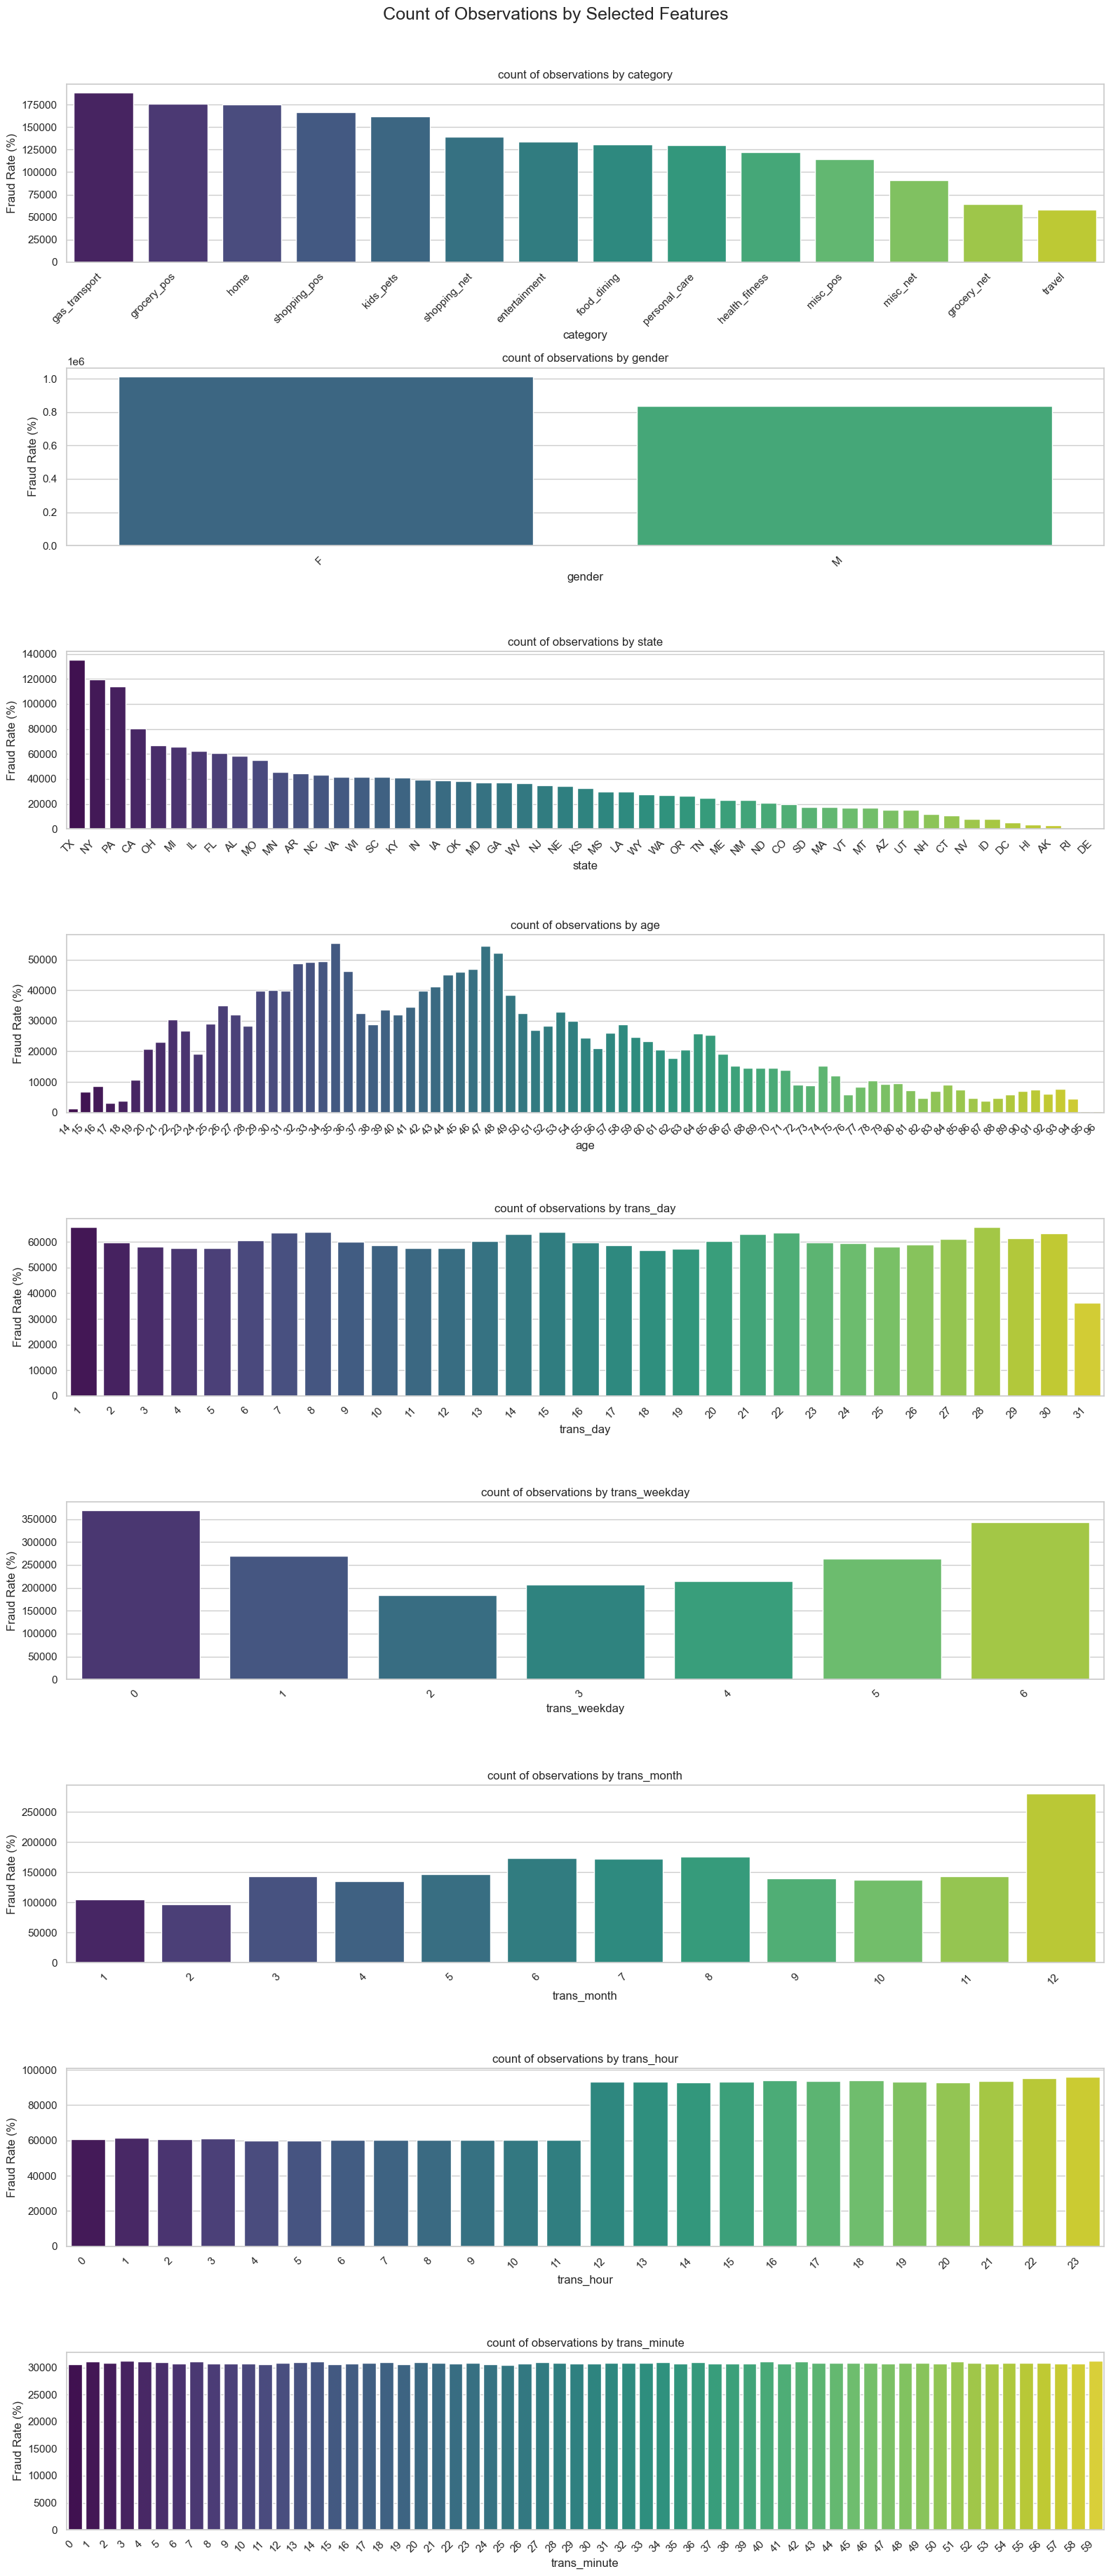

In [ ]:
# Set plot style
sn.set(style="whitegrid")
plt.figure(figsize=(16, 4 * len(features_cols)))

for i, col in enumerate(features_cols, 1):
    plt.subplot(len(features_cols), 1, i)
    temp = full_df.groupby(col)['is_fraud'].count().sort_values(ascending=False)
    sn.barplot(x=temp.index, y=temp.values, palette="viridis")
    plt.ylabel('Fraud Rate (%)')
    plt.title(f'count of observations by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.suptitle("Count of Observations by Selected Features", fontsize=18, y=1.02)
plt.show()

We get summmary insights from the different features in the dataset.

In [ ]:
#summary statistics of numeric features
full_df.describe()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_day,trans_weekday,trans_month,trans_year,trans_hour,trans_minute,age
count,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000
mean,70.063567,48813.258191,38.539311,-90.227832,88643.674509,38.538976,-90.227940,0.005210,15.850756,2.967456,7.152067,2019.500727,12.806119,29.497306,46.211380
std,159.253975,26881.845966,5.071470,13.747895,301487.618344,5.105604,13.759692,0.071992,8.876245,2.197983,3.424954,0.500000,6.815753,17.326269,17.395446
min,1.000000,1257.000000,20.027100,-165.672300,23.000000,19.027422,-166.671575,0.000000,1.000000,0.000000,1.000000,2019.000000,0.000000,0.000000,14.000000
25%,9.640000,26237.000000,34.668900,-96.798000,741.000000,34.740122,-96.899440,0.000000,8.000000,1.000000,4.000000,2019.000000,7.000000,14.000000,33.000000
50%,47.450000,48174.000000,39.354300,-87.476900,2443.000000,39.368900,-87.440694,0.000000,16.000000,3.000000,7.000000,2020.000000,14.000000,30.000000,44.000000
75%,83.100000,72042.000000,41.940400,-80.158000,20328.000000,41.956263,-80.245108,0.000000,24.000000,5.000000,10.000000,2020.000000,19.000000,45.000000,57.000000
max,28948.900000,99921.000000,66.693300,-67.950300,2906700.000000,67.510267,-66.950902,1.000000,31.000000,6.000000,12.000000,2020.000000,23.000000,59.000000,96.000000


In [ ]:
#summary insights of non-numeric features
full_df.describe(include='object')

,merchant,category,gender,city,state,job
count,1852394,1852394,1852394,1852394,1852394,1852394
unique,693,14,2,906,51,497
top,fraud_Kilback LLC,gas_transport,F,Birmingham,TX,Film/video editor
freq,6262,188029,1014749,8040,135269,13898


In [ ]:
#fraud rate by job title
fraud_by_jobs = (
    full_df.groupby('job')['is_fraud']
    .mean()
    .multiply(100)
    .reset_index(name='fraud_rate_%')
    .sort_values(by='fraud_rate_%', ascending=False)
)

# Top 10 jobs with highest fraud rate
top_fraud_jobs = fraud_by_jobs.head(10)
print("Top 10 Jobs with Highest Fraud Rate:\n")
print(top_fraud_jobs.to_string(index=False))

print()

# Bottom 10 jobs with lowest fraud rate
bottom_fraud_jobs = fraud_by_jobs.tail(10)
print("\nBottom 10 Jobs with Lowest Fraud Rate:\n")
print(bottom_fraud_jobs.to_string(index=False))

Top 10 Jobs with Highest Fraud Rate:

                              job  fraud_rate_%
           Air traffic controller    100.000000
                  Careers adviser    100.000000
             Broadcast journalist    100.000000
   Armed forces technical officer    100.000000
       Contracting civil engineer    100.000000
Sales promotion account executive    100.000000
                      Ship broker    100.000000
                Software engineer    100.000000
                        Solicitor    100.000000
                           Dancer    100.000000


Bottom 10 Jobs with Lowest Fraud Rate:

                         job  fraud_rate_%
 Corporate investment banker      0.137127
Medical sales representative      0.136818
         Designer, furniture      0.114364
Designer, exhibition/display      0.091366
                Statistician      0.082305
            Health physicist      0.068587
                  Contractor      0.045809
    Engineer, communications      0.000000
     

In [ ]:
#fraud rate by city
fraud_by_jobs = (
    full_df.groupby('city')['is_fraud']
    .mean()
    .multiply(100)
    .reset_index(name='fraud_rate_%')
    .sort_values(by='fraud_rate_%', ascending=False)
)

# Top 10 jobs with highest fraud rate
top_fraud_jobs = fraud_by_jobs.head(10)
print("Top 10 Cities with Highest Fraud Rate:\n")
print(top_fraud_jobs.to_string(index=False))

print()

# Bottom 10 jobs with lowest fraud rate
bottom_fraud_jobs = fraud_by_jobs.tail(10)
print("\nBottom 10 Cities with Lowest Fraud Rate:\n")
print(bottom_fraud_jobs.to_string(index=False))

Top 10 Cities with Highest Fraud Rate:

        city  fraud_rate_%
   Lexington    100.000000
Madisonville    100.000000
     Ashland    100.000000
      Beacon    100.000000
   La Grande    100.000000
    Lockhart    100.000000
    Kirtland    100.000000
    Kirkwood    100.000000
      Phelps    100.000000
   Las Vegas    100.000000


Bottom 10 Cities with Lowest Fraud Rate:

        city  fraud_rate_%
Pewee Valley      0.000000
        Cord      0.000000
     Lubbock      0.000000
 Clay Center      0.000000
    Tomahawk      0.000000
 Mayersville      0.000000
   Milwaukee      0.000000
    Belgrade      0.000000
     Ballwin      0.000000
     Wheaton      0.000000


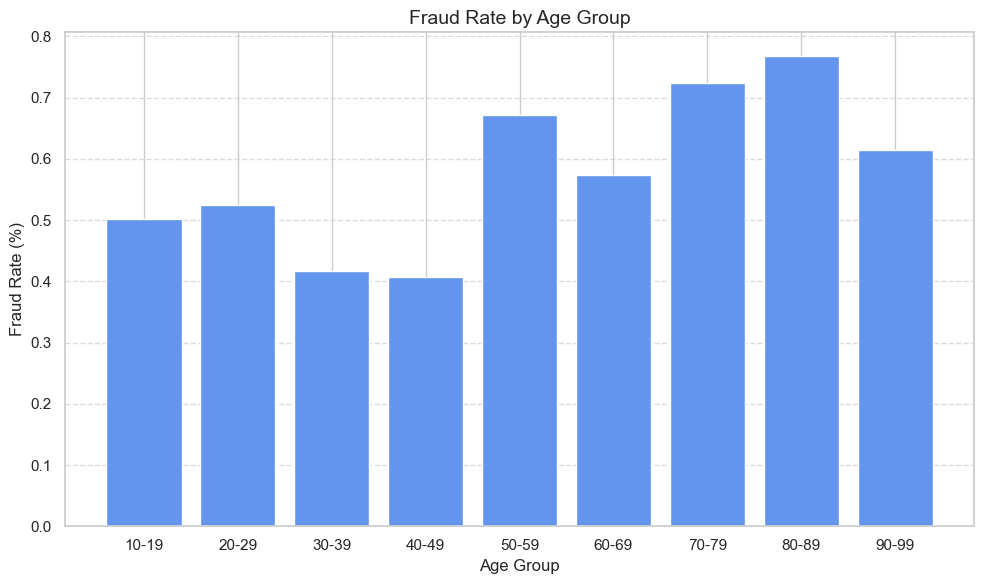

In [ ]:
#Check fraud rates by age group

# 1. Define age bins and labels
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# 2. Create a new age group column
full_df['age_group'] = pd.cut(full_df['age'], bins=age_bins, labels=age_labels, right=False)

# 3. Group by age group and calculate fraud rate
age_grouped = (
    full_df.groupby('age_group')['is_fraud']
    .mean()
    .multiply(100)
    .reset_index(name='fraud_rate_%')
)

# 4. Plot histogram-style bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_grouped['age_group'], age_grouped['fraud_rate_%'], color='cornflowerblue')
plt.title('Fraud Rate by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Fraud Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

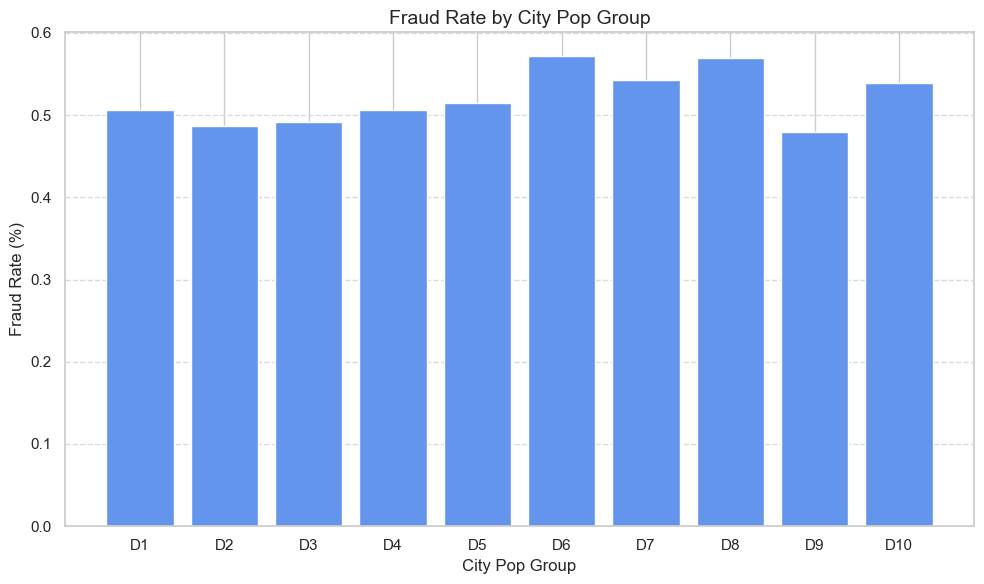

In [ ]:
#Check fraud rates by city pop, we use deciles as bins

# 1. Define age bins and labels
citypop_bins = [23, 260, 566, 937, 1628, 2443, 4677, 9993, 42384, 186140, 2906701]
citypop_labels = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',]

# 2. Create a new city pop group column
full_df['city_pop_group'] = pd.cut(full_df['city_pop'], bins=citypop_bins, labels=citypop_labels, right=False)

# 3. Group by city pop group and calculate fraud rate
age_grouped = (
    full_df.groupby('city_pop_group')['is_fraud']
    .mean()
    .multiply(100)
    .reset_index(name='fraud_rate_%')
)

# 4. Plot histogram-style bar plot
plt.figure(figsize=(10, 6))
plt.bar(age_grouped['city_pop_group'], age_grouped['fraud_rate_%'], color='cornflowerblue')
plt.title('Fraud Rate by City Pop Group', fontsize=14)
plt.xlabel('City Pop Group')
plt.ylabel('Fraud Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Correlation

We want to reduce our dataset by removing features that are highly correlated.

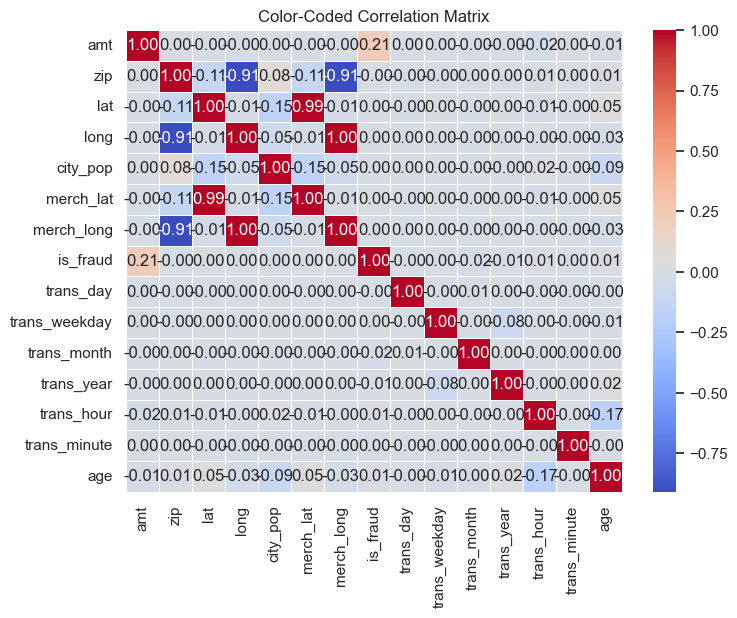

In [ ]:
#Finding correlation of numeric variables
corrMatrix = full_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Color-Coded Correlation Matrix')
plt.show()

In [ ]:
#Check list of features
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column          Dtype   
---  ------          -----   
 0   merchant        object  
 1   category        object  
 2   amt             float64 
 3   gender          object  
 4   city            object  
 5   state           object  
 6   zip             int64   
 7   lat             float64 
 8   long            float64 
 9   city_pop        int64   
 10  job             object  
 11  merch_lat       float64 
 12  merch_long      float64 
 13  is_fraud        int64   
 14  trans_day       int32   
 15  trans_weekday   int32   
 16  trans_month     int32   
 17  trans_year      int32   
 18  trans_hour      int32   
 19  trans_minute    int32   
 20  age             int32   
 21  age_group       category
 22  city_pop_group  category
dtypes: category(2), float64(5), int32(7), int64(3), object(6)
memory usage: 265.0+ MB


## Final Data Assumptions

Given the results of the exploratory data analysis, here are the assumptions for each feature so far.
1. merchant - to be used
2. category - to be used
3. amt - to be used
4.  ~~gender~~ - to be dropped
5.  ~~city~~ - to be dropped, implicit in lat and long
6. ~~state~~ - to be dropped, implicit in lat and long
7.  ~~zip~~ - to be dropped, implicit in lat and long
8.  lat - to be used
9.  long - to be used
10. city_pop - to be used
11. job - to be used
12. merch_lat - to be used
13. merch_long - to be used
14. is_fraud - target variable
15. trans_day - to be be used
16. trans_weekday - to be used
17. trans_month - to be used
18. trans_year - to be used
19. trans_hour - to be used
20. trans_minute - to be used
21. age - to be used
22. age_group - to be used
23. ~~city_pop_group~~ - will be dropped, city_pop will be used

Furthermore, here are the overall data design:
1. Categorical variables will be encoded.
2. There are no null values for each variable.
3. Numeric variables will be scaled.

In [ ]:
#check for null values
full_df.isnull().sum()

merchant          0
category          0
amt               0
gender            0
city              0
state             0
zip               0
lat               0
long              0
city_pop          0
job               0
merch_lat         0
merch_long        0
is_fraud          0
trans_day         0
trans_weekday     0
trans_month       0
trans_year        0
trans_hour        0
trans_minute      0
age               0
age_group         0
city_pop_group    0
dtype: int64

## Data Extraction for Model Training

In [ ]:
# creating final analytical base table
training_df_final = full_df

X = training_df_final.drop(columns=['state', 'gender', 'zip', 'city_pop_group', 'is_fraud', 'city'])
y = training_df_final['is_fraud']
y = y.astype(float)

## Test and Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
columns = X.loc[:, X.columns != 'is_fraud'].columns

X_train_orig = X_train.copy()
X_test_orig = X_test.copy()

print(f"X_train shape: ", X_train.shape)
print(f"y_train shape: ", y_train.shape)
print()
print(f"X_test shape: ", X_test.shape)
print(f"y-test shape: ", y_test.shape)

X_train shape:  (1481915, 17)
y_train shape:  (1481915,)

X_test shape:  (370479, 17)
y-test shape:  (370479,)


## Transformation of Categorical Variables

In [ ]:
# Columns to encode
cat_cols = ['merchant', 'category', 'job', 'age_group']

# Initialize encoder
le = LabelEncoder()

# Encode each column
for col in cat_cols:
    X_train [col] = le.fit_transform(X_train [col])
    X_test [col] = le.fit_transform(X_test [col])

## Scaling of Test Data

In [ ]:
# Select only numeric columns to scale
cols_to_scale = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'trans_day', 'trans_weekday', 'trans_month', 'trans_year', 'trans_hour', 'trans_minute', 'age']

# Initialize scaler
scaler = StandardScaler()

# Fit the scaler on X_train only and transform
X_train_scaled = X_train.copy()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Use the same scaler (do not refit) to transform X_test
X_test_scaled = X_test.copy()
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

## Base Logistic Regression

In this first model, this will serve as our base model.

In [ ]:
# Base model using all variables
logreg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

# Let's input our training data set and fit our model
logreg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [ ]:
#Check coefficient of features
feature_names = X_train_scaled.columns

# Access the coefficients
coefficients = logreg.coef_[0] # For binary classification, coef_ is a 2D array, take the first row

# Create a Series to map feature names to coefficients
feature_weights = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Print the feature weights
sorted_feature_weights = feature_weights.reindex(feature_weights['Coefficient'].abs().sort_values(ascending=False).index)
sorted_feature_weights

,Feature,Coefficient
2,amt,1.229011
8,merch_long,-0.463819
4,long,0.459151
15,age,0.315750
11,trans_month,-0.245296
3,lat,0.154769
7,merch_lat,-0.154612
16,age_group,-0.142508
12,trans_year,-0.085006
1,category,-0.083946


In [ ]:
# predict against X_test
y_pred = logreg.predict(X_test_scaled)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

## Base Model Metrics

We look at the performance of our model.

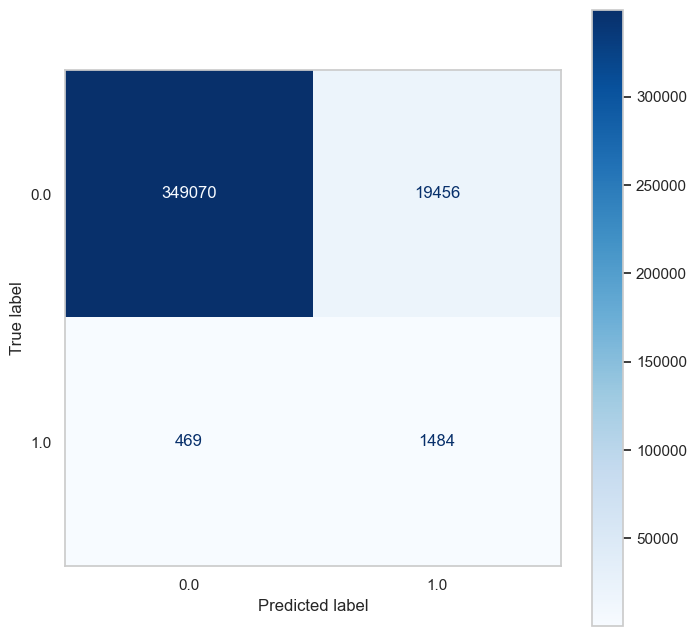

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)
disp = ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test,
                                             values_format='d', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
# Print model metrics results (in %)

# How much are classified in the positive class that are ACTUALLY positive?
# Returns mostly positive instances.
print("Precision    :", precision_score(y_test, y_pred)*100)

# How much of the positives did we correctly classify as positive?
# Finds as many positive instances as possible.
print("Recall       :", recall_score(y_test, y_pred)*100)

# How much of the total did we predict correctly?
# The closer to 1 the better (meaning 100% accurate)
print("Accuracy     :", accuracy_score( y_test, y_pred)*100)

Precision    : 7.0869149952244515
Recall       : 75.98566308243727
Accuracy     : 94.6218274180183


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.862


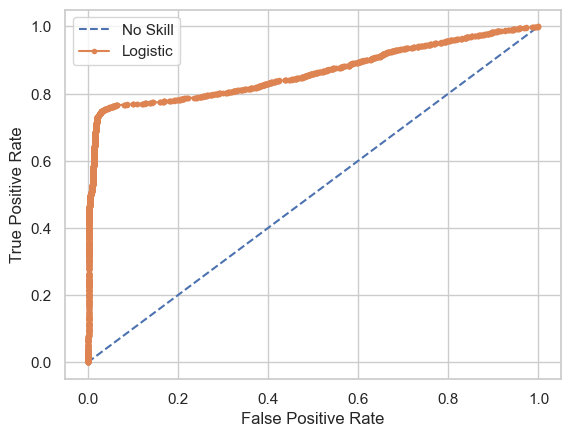

In [ ]:
# ROC Curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = logreg.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Model Optimization thorugh Recursive Feature Elimination

In this second model, we will use recursive feature elimination to select the features that will be included in the model.

In [ ]:
# Recursive Feature Elimination - iterate thru features and
# Using RFE to prioritize variables based on feature importance (default uses coef_ or feature_importances_)

# identify top x most significant features (default uses half)
rfe_logreg = LogisticRegression(random_state=42)
rfe = RFE(rfe_logreg) # if no value is passed for no. of features to identify, it will default to half of total features
rfe = rfe.fit(X_train_scaled, y_train)

In [ ]:
# print dataframe
rfe_df = pd.DataFrame([columns, rfe.support_, rfe.ranking_]).T
rfe_df.columns = ['name', 'support', 'rank']
rfe_df

,name,support,rank
0,merchant,False,10
1,category,False,7
2,amt,True,1
3,lat,True,1
4,long,False,2
5,city_pop,False,4
6,job,False,9
7,merch_lat,False,5
8,merch_long,False,3
9,trans_day,False,6


In [ ]:
# Let's filter our train data set to the prioritized features
prioritized_features = rfe_df[rfe_df['support']==True]['name'].values
prioritized_X_train_scaled = X_train_scaled[prioritized_features]

In [ ]:
prioritized_X_train_scaled.head()

,amt,lat,trans_weekday,trans_month,trans_year,trans_hour,age,age_group
1273644,0.602463,0.158247,0.924628,-0.336518,0.998621,-0.852358,1.597376,6
601398,-0.256872,-0.821478,0.014786,0.539523,-1.001381,0.908543,0.102665,3
999645,-0.200368,0.351326,0.469707,-1.504573,0.998621,-1.145842,-0.932135,2
1180310,-0.320166,0.529718,0.469707,-0.628532,0.998621,-1.879550,0.850020,5
213847,-0.227717,-1.305211,0.924628,0.539523,0.998621,-1.586067,0.217642,4


## Remodel Using Prioritized Features

In [ ]:
# Use the new training data set to train/fit our new model
logreg2 = LogisticRegression(random_state=42, solver='liblinear', max_iter=100)
logreg2.fit(prioritized_X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
#Check coefficient of features
feature_names_2 = prioritized_X_train_scaled.columns

# Access the coefficients
coefficients_2 = logreg2.coef_[0] # For binary classification, coef_ is a 2D array, take the first row

# Create a Series to map feature names to coefficients
feature_weights_2 = pd.DataFrame({'Feature': feature_names_2, 'Coefficient': coefficients_2})

# Print the feature weights
sorted_feature_weights_2 = feature_weights_2.reindex(feature_weights_2['Coefficient'].abs().sort_values(ascending=False).index)
sorted_feature_weights_2

,Feature,Coefficient
0,amt,0.389366
3,trans_month,-0.245749
6,age,0.224103
5,trans_hour,0.189966
4,trans_year,-0.089539
2,trans_weekday,0.066145
1,lat,0.037352
7,age_group,-0.014034


In [ ]:
# predict against X test
prioritized_y_pred = logreg2.predict(X_test_scaled[prioritized_features])
prioritized_y_pred

array([0., 0., 0., ..., 0., 0., 0.])

## Remodel Metrics

We look at the performance of our model that uses only prioritized columns.

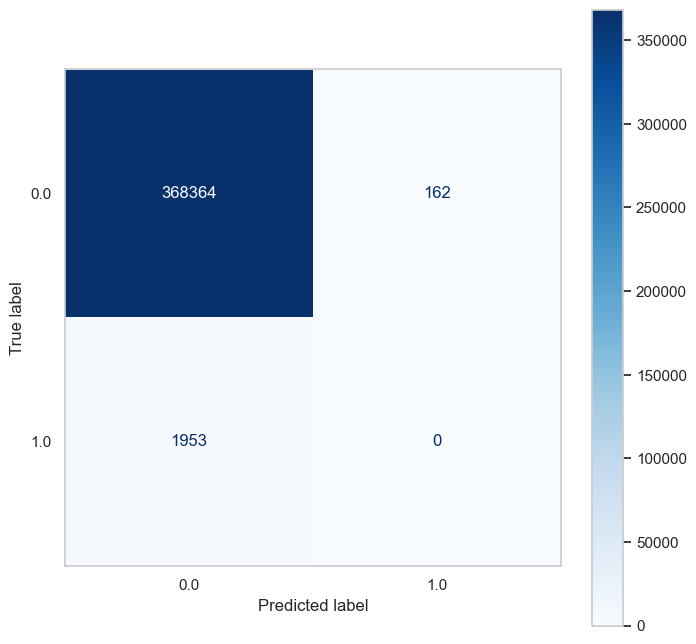

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)
disp = ConfusionMatrixDisplay.from_estimator(logreg2, X_test_scaled[prioritized_features], y_test,
                                             values_format='d', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
# Print model metrics results (in %)

# How much are classified in the positive class that are ACTUALLY positive?
# Returns mostly positive instances.
print("Precision    :", precision_score(y_test, prioritized_y_pred)*100)

# How much of the positives did we correctly classify as positive?
# Finds as many positive instances as possible.
print("Recall       :", recall_score(y_test, prioritized_y_pred)*100)

# How much of the total did we predict correctly?
# The closer to 1 the better (meaning 100% accurate)
print("Accuracy     :", accuracy_score(y_test, prioritized_y_pred)*100)

Precision    : 0.0
Recall       : 0.0
Accuracy     : 99.42911743985489


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.834


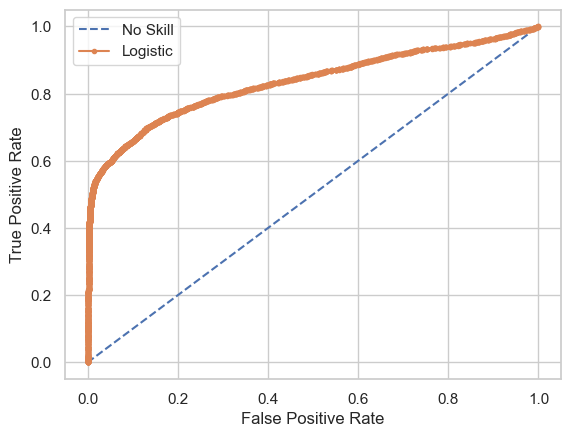

In [ ]:
# ROC Curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = logreg2.predict_proba(X_test_scaled[prioritized_features])
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Third Model Using One Hot Encoding for Categorical Features

In third model, we will build a new model using one hot encoding for categorical features.

In [ ]:
# creating a new analytical base table for the model by adding one hot encoding for categorical variables.
cat_processed_training_df = pd.get_dummies(X[cat_cols])
num_processed_training_df = X[cols_to_scale]
final_training_df_3 = pd.concat([cat_processed_training_df, num_processed_training_df, training_df['is_fraud']], axis=1)

### Test and Train Split

In [ ]:
X_3 = final_training_df_3.loc[:, final_training_df_3.columns != 'is_fraud']
y_3 = final_training_df_3['is_fraud'].astype(float) # convert to float

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.20, random_state=42)

print(f"X_train_3 shape: ", X_train_3.shape)
print(f"y_train_3 shape: ", y_train_3.shape)
print()
print(f"X_test_3 shape: ", X_test_3.shape)
print(f"y-test_3 shape: ", y_test_3.shape)

X_train_3 shape:  (1481915, 1226)
y_train_3 shape:  (1481915,)

X_test_3 shape:  (370479, 1226)
y-test_3 shape:  (370479,)


### Scaling of Test Data

In [ ]:
## Scaling of Test Data for third model

# Fit the scaler on X_train only and transform
X_train_3_scaled = X_train_3.copy()
X_train_3_scaled[cols_to_scale] = scaler.fit_transform(X_train_3[cols_to_scale])

# Use the same scaler (do not refit) to transform X_test
X_test_3_scaled = X_test_3.copy()
X_test_3_scaled[cols_to_scale] = scaler.transform(X_test_3[cols_to_scale])

### Base Model

In [ ]:
# Base model using all variables
logreg3 = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

# Let's input our training data set and fit our model
logreg3.fit(X_train_3_scaled, y_train_3)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [ ]:
#Check coefficient of features
feature_names_3 = X_train_3_scaled.columns

# Access the coefficients
coefficients_3 = logreg3.coef_[0] # For binary classification, coef_ is a 2D array, take the first row

# Create a Series to map feature names to coefficients
feature_weights_3 = pd.DataFrame({'Feature': feature_names_3, 'Coefficient': coefficients_3})

# Print the feature weights
sorted_feature_weights_3 = feature_weights_3.reindex(feature_weights_3['Coefficient'].abs().sort_values(ascending=False).index)
sorted_feature_weights_3.head(10)

,Feature,Coefficient
621,merchant_fraud_Tillman LLC,-6.773084
516,"merchant_fraud_Ritchie, Bradtke and Stiedemann",-6.330439
292,merchant_fraud_Johnston-Casper,-6.299777
216,merchant_fraud_Hackett Group,-5.772308
1051,job_Planning and development surveyor,-5.592063
975,job_Legal secretary,5.247267
1143,job_Stage manager,-5.211391
758,job_Broadcast journalist,5.206867
742,job_Armed forces technical officer,5.167942
953,job_Information officer,5.134169


In [ ]:
# predict against X test
y_pred_3 = logreg3.predict(X_test_3_scaled)
y_pred_3

array([1., 0., 1., ..., 0., 0., 0.])

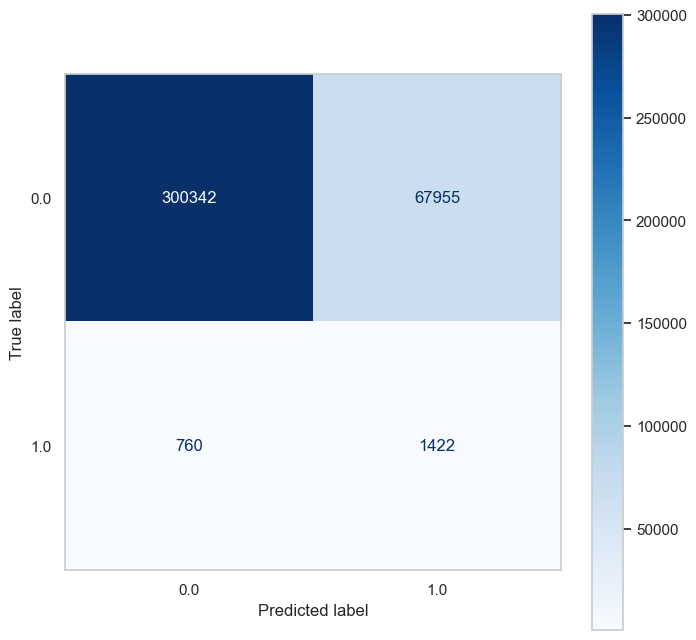

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)
disp = ConfusionMatrixDisplay.from_estimator(logreg3, X_test_3_scaled, y_test_3,
                                             values_format='d', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
# Print model metrics results (in %)

# How much are classified in the positive class that are ACTUALLY positive?
# Returns mostly positive instances.
print("Precision    :", precision_score(y_test_3, y_pred_3)*100)

# How much of the positives did we correctly classify as positive?
# Finds as many positive instances as possible.
print("Recall       :", recall_score(y_test_3, y_pred_3)*100)

# How much of the total did we predict correctly?
# The closer to 1 the better (meaning 100% accurate)
print("Accuracy     :", accuracy_score(y_test_3, y_pred_3)*100)

Precision    : 2.04967064012569
Recall       : 65.16956920256646
Accuracy     : 81.45239001400888


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.808


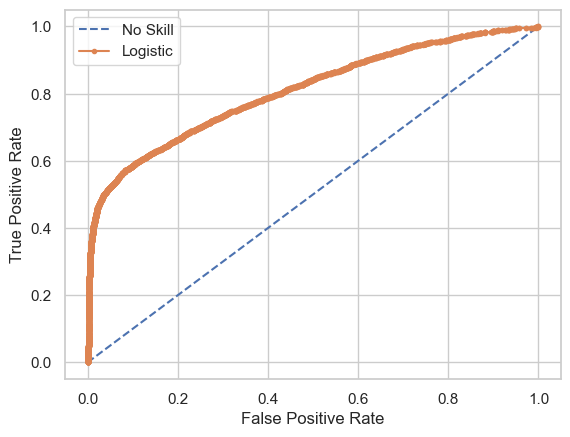

In [ ]:
# ROC Curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test_3))]
lr_probs = logreg3.predict_proba(X_test_3_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_3, ns_probs)
lr_auc = roc_auc_score(y_test_3, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_3, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_3, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Conclusion

The summary of the three models
1. Base Model - Highest precision and recall
2. Remodel using RFE - Highest accuracy but 0 precision and recall, lowest number of features
3. Third Model - Lowest metrics, highest number of features due to one hot encoding

The base model which uses the unmodified number of features has performed the best.

## Recommendations

Other methods of optimization such as the use of hyperparameters may be implemented to improve the performance of the base model. Furthermore, a better data pipeline can be designed to ensure the splitted train and test data for all models and succeeding optimizations and improvements are the same.